# Steps

* Initialize Weights & Bias as Zero
* Scoring using : y_pred = wx * b
* Calculate the Error
* Use Gradient Descent to find out the new weights & bias 
* Repeat n times

# 0. Setting Up

## 0.1 Import Packages

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [29]:
import matplotlib.pyplot as plt

## 0.2 Utilities

In [30]:
class LinearRegressionCustom:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = 2 * np.dot(X.T, (y_pred - y)) / n_samples
            db = 2 * np.sum(y_pred - y) / n_samples
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



        
            

In [31]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [32]:
def plot_pred(model, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], y, color='blue', label='Actual Data')
    plt.scatter(X, model.predict(X), color='red', label='Predicted Data')
    y_pred_line = model.predict(X)
    plt.plot(X[:, 0], y_pred_line, color='black', linestyle='--', linewidth=2, label='Regression Line')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

# 1. The Data

In [33]:
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state= 99)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)


# 2. The Model
regressor = LinearRegressionCustom()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
res = mse(y_test, y_pred)

# 3. The Results
print(res)

403.4096660884804


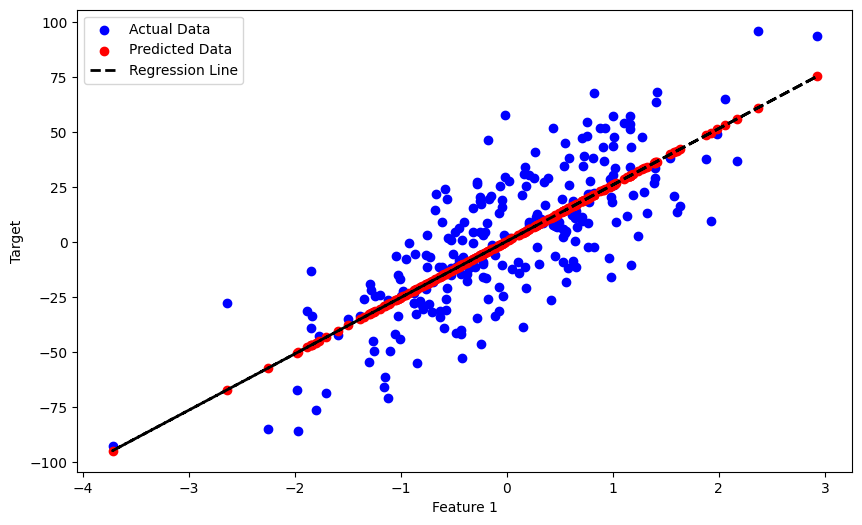

In [34]:
plot_pred(regressor, X_test, y_test)

403.40966607787703


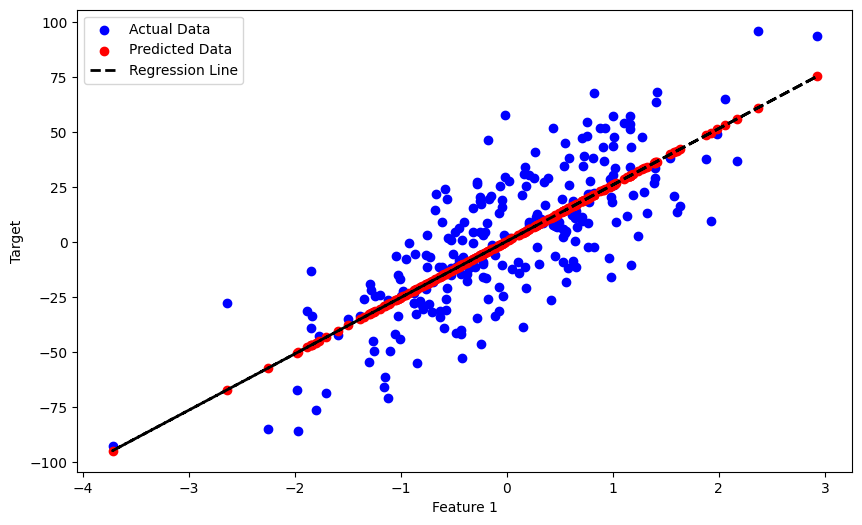

In [35]:
regressor = LinearRegressionCustom(learning_rate=0.001, n_iters=10000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
res = mse(y_test, y_pred)

print(res)

plot_pred(regressor, X_test, y_test)



# END